# Demonstrate that timing of cell birth throughout the movie has no influence on the intermitotic time of proliferating cells:

Does the time when a cell is born influence how long it takes to divide? You may speculate that the observed cell cycle duration heterogeneity is only present because the fast dividers are a consequence of the cell culture being non-confluent & having plenty of space & food to divide, while the slow dividers take much longer because they must overcome spatial constraints (contact inhibition) & lower nutritional profile (depleted medium supplies). _This notebook will teach you how to show that this hypothesis, althought perfectly reasonable, doesn't apply!_

### Guildelines:

Filter cells exactly as before in notebook as previously. If you need to refresh your memory, check the notebook *'01_Cycling_Duration_Histogram.ipynb'*

In [1]:
import h5py
import math
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

from Find_Family_Members import Find_Family
from tqdm import tqdm
from scipy import stats


In [2]:
hdf5_file = "../example_segment_classif_tracked_movie.hdf5"


In [3]:
cct, cbt = [], []

with h5py.File(hdf5_file, 'r') as f:
    for cell, progeny in zip(f['tracks']['obj_type_1']['LBEPR'], f['tracks']['obj_type_1']['Ch_Ch_Gen_CCT']):
        if progeny[0] != 0 and progeny[1] != 0 and progeny[2] != 0 and progeny[2] < 7 and 7.0 <= progeny[3] <= 42.0:
            cct.append(progeny[3])
            cbt.append(cell[1])


### Change to hours when plotting:

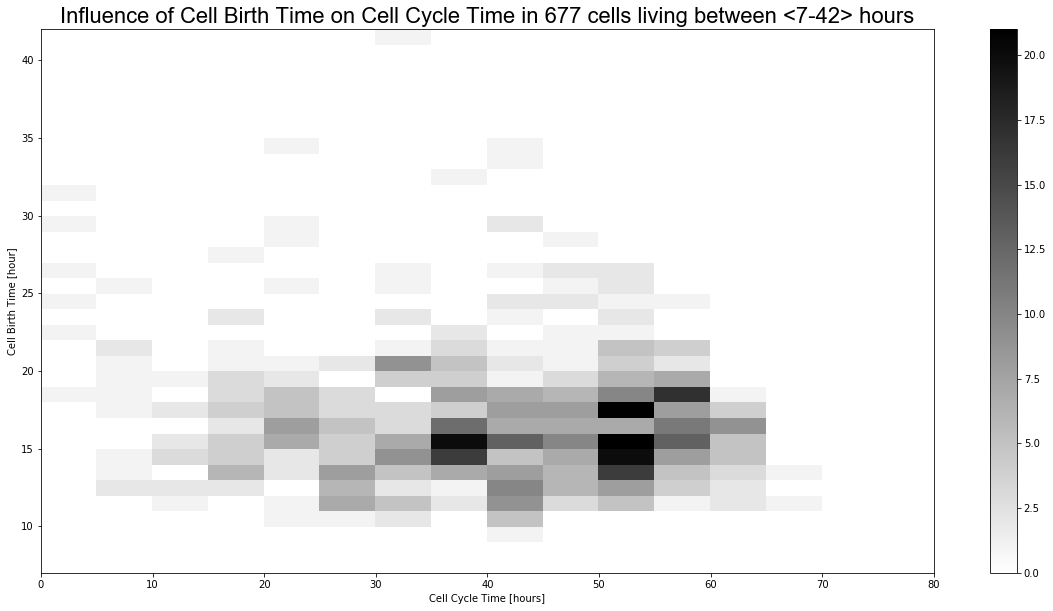

In [4]:
_ = plt.figure(figsize=(20, 10))
plt.hist2d(x=[item * 4 / 60 for item in cbt], y=cct, bins=(16, 35), range=((0, 80), (7, 42)), cmap="binary")
plt.title(f"Influence of Cell Birth Time on Cell Cycle Time in {len(cct)} cells living between <7-42> hours", fontname="Arial", fontsize=22)
plt.xlabel("Cell Cycle Time [hours]")
plt.ylabel("Cell Birth Time [hour]")
plt.colorbar()
plt.show()


### Calculate mean / median per histogram row to display in scatter plot:

In [5]:
lower, upper = 0, 10
mean_list, median_list, std_list, sem_list = [], [], [], []

for i in range(7): 
    cbt_ranged = [item_cct for item_cbt, item_cct in zip(cbt, cct) if lower <= item_cbt * 4 / 60 < upper]
    mean_list.append(np.mean(cbt_ranged))
    std_list.append(np.std(cbt_ranged))
    sem_list.append(np.std(cbt_ranged)/np.sqrt(len(cbt_ranged)))
    median_list.append(np.median(cbt_ranged))
    lower += 10 
    upper += 10 


### Plot as scatter plot with calculated mean cell cycle durations per birth time bin:

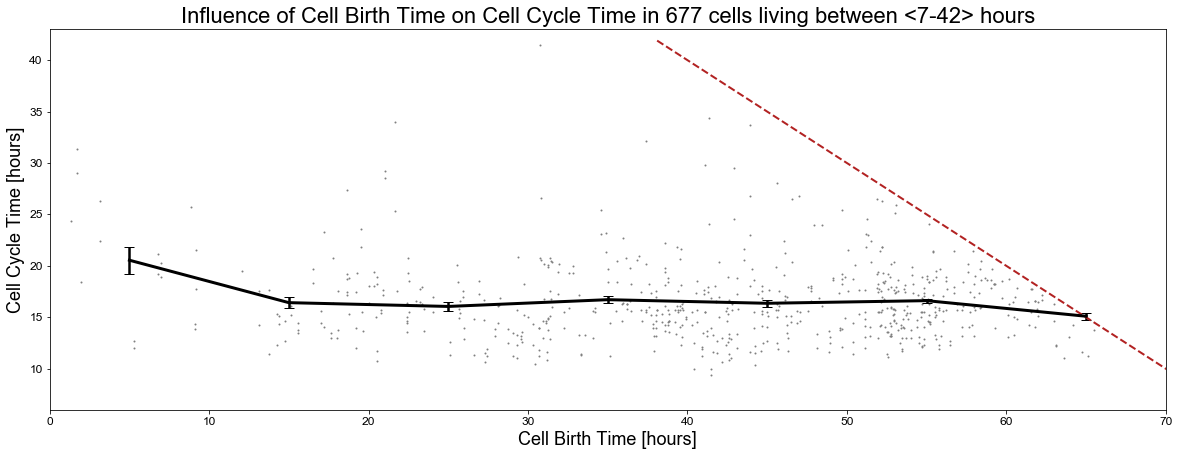

In [8]:
_ = plt.figure(figsize=(20, 7))
plt.scatter(x=[item * 4 / 60 for item in cbt], y=cct, s=1, color="grey", alpha=1.0)
plt.errorbar(x=range(5, 75, 10), y=mean_list, yerr=sem_list, color="black", linewidth=3.0, linestyle="solid", capsize=5, ecolor="black", elinewidth=2.5, label="Mean")
plt.plot([80, 80-42], [0, 42], linestyle="dashed", linewidth=2.0, color="firebrick")
plt.title(f"Influence of Cell Birth Time on Cell Cycle Time in {len(cct)} cells living between <7-42> hours", fontname="Arial", fontsize=22)
plt.ylabel("Cell Cycle Time [hours]", fontname="Arial", fontsize=18)
plt.xlabel("Cell Birth Time [hours]", fontname="Arial", fontsize=18)
plt.xticks(fontname="Arial", fontsize=12)
plt.yticks(fontname="Arial", fontsize=12)
plt.ylim(6, 43)
plt.xlim(0, 70)
plt.show()
plt.close()


### Done!